In [1]:
import json
import numpy as np
def load_json():
    
    authors = []
    features = []
    scores = []
    
    with open('dataset.json') as data_file:
        data = json.load(data_file)
        labels = data["column_descriptors"]
        author_data = data["author_data"]
        
        for author in author_data.keys():
            authors.append(author)
            features.append(author_data[author]['feature_vecs'])
            scores_str = author_data[author]['scores']
            scores.append(np.asarray([int(score_) for score_ in scores_str]))
    
    features = [np.asarray(feature) for feature in features]
    
    return labels, authors, features, scores

In [2]:
labels, authors, features, scores = load_json()
labels = [label.strip() for label in labels]
print (authors[0], features[0].shape, scores[0].shape, "\n")

(u'bodmas', (3, 34), (3,), '\n')


In [3]:
X_list =[]
y_list = []

for index in range(len(authors)):
    X_list.extend(features[index])
    y_list.extend(scores[index])
X = np.asarray(X_list)
y = np.asarray(y_list)

print (X.shape, y.shape)

((18667, 34), (18667,))


In [4]:
#set last column to -5 instead of 150000 for easier visualization

last_col = X.shape[1]-1

for i in range(len(X)):
    if X[i][last_col] != 150000:
        X[i][last_col] = X[i][last_col]
    else:
        X[i][last_col] = -5

In [5]:
#drop the ones with more than 100 points ( those are from the qualification round which has more than 100)
dropping_list = [i for i in range(len(y)) if y[i] > 100]

print len(dropping_list)
#for i in reversed(dropping_list)
X = np.delete(X, dropping_list, axis=0)
y = np.delete(y, dropping_list, axis=0)

661


In [6]:
import pandas as pd

print (X.shape)
df_before_feature_sel = pd.DataFrame(X)

(18006, 34)


In [7]:
for i, label in enumerate(labels):
    print (i, label)

(0, u'number_of_modules')
(1, u'lines_of_code')
(2, u'lines_of_code_per_module')
(3, u'McCabes_cyclomatic_complexity')
(4, u'McCabes_cyclomatic_complexity_per_module')
(5, u'lines_of_comment')
(6, u'lines_of_comment_per_module')
(7, u'lines_of_code_per_line_of_comment')
(8, u'McCabes_cyclomatic_complexity_per_line_of_comment')
(9, u'IF4')
(10, u'IF4_per_module')
(11, u'IF4_visible')
(12, u'IF4_visible_per_module')
(13, u'IF4_concrete')
(14, u'IF4_concrete')
(15, u'rejected_lines_of_code')
(16, u'Files')
(17, u'Lines')
(18, u'AVG Len')
(19, u'Code')
(20, u'Comments')
(21, u'White SP')
(22, u'Cd/Cm+WS')
(23, u'Cd/Cm')
(24, u'Cd/WS')
(25, u'% Code')
(26, u'cnt_classes')
(27, u'max_member_funs')
(28, u'max_nested_loops')
(29, u'max_nesting_depth')
(30, u'max_params_in_decl')
(31, u'member_funs')
(32, u'member_vars')
(33, u'min_member_funs')


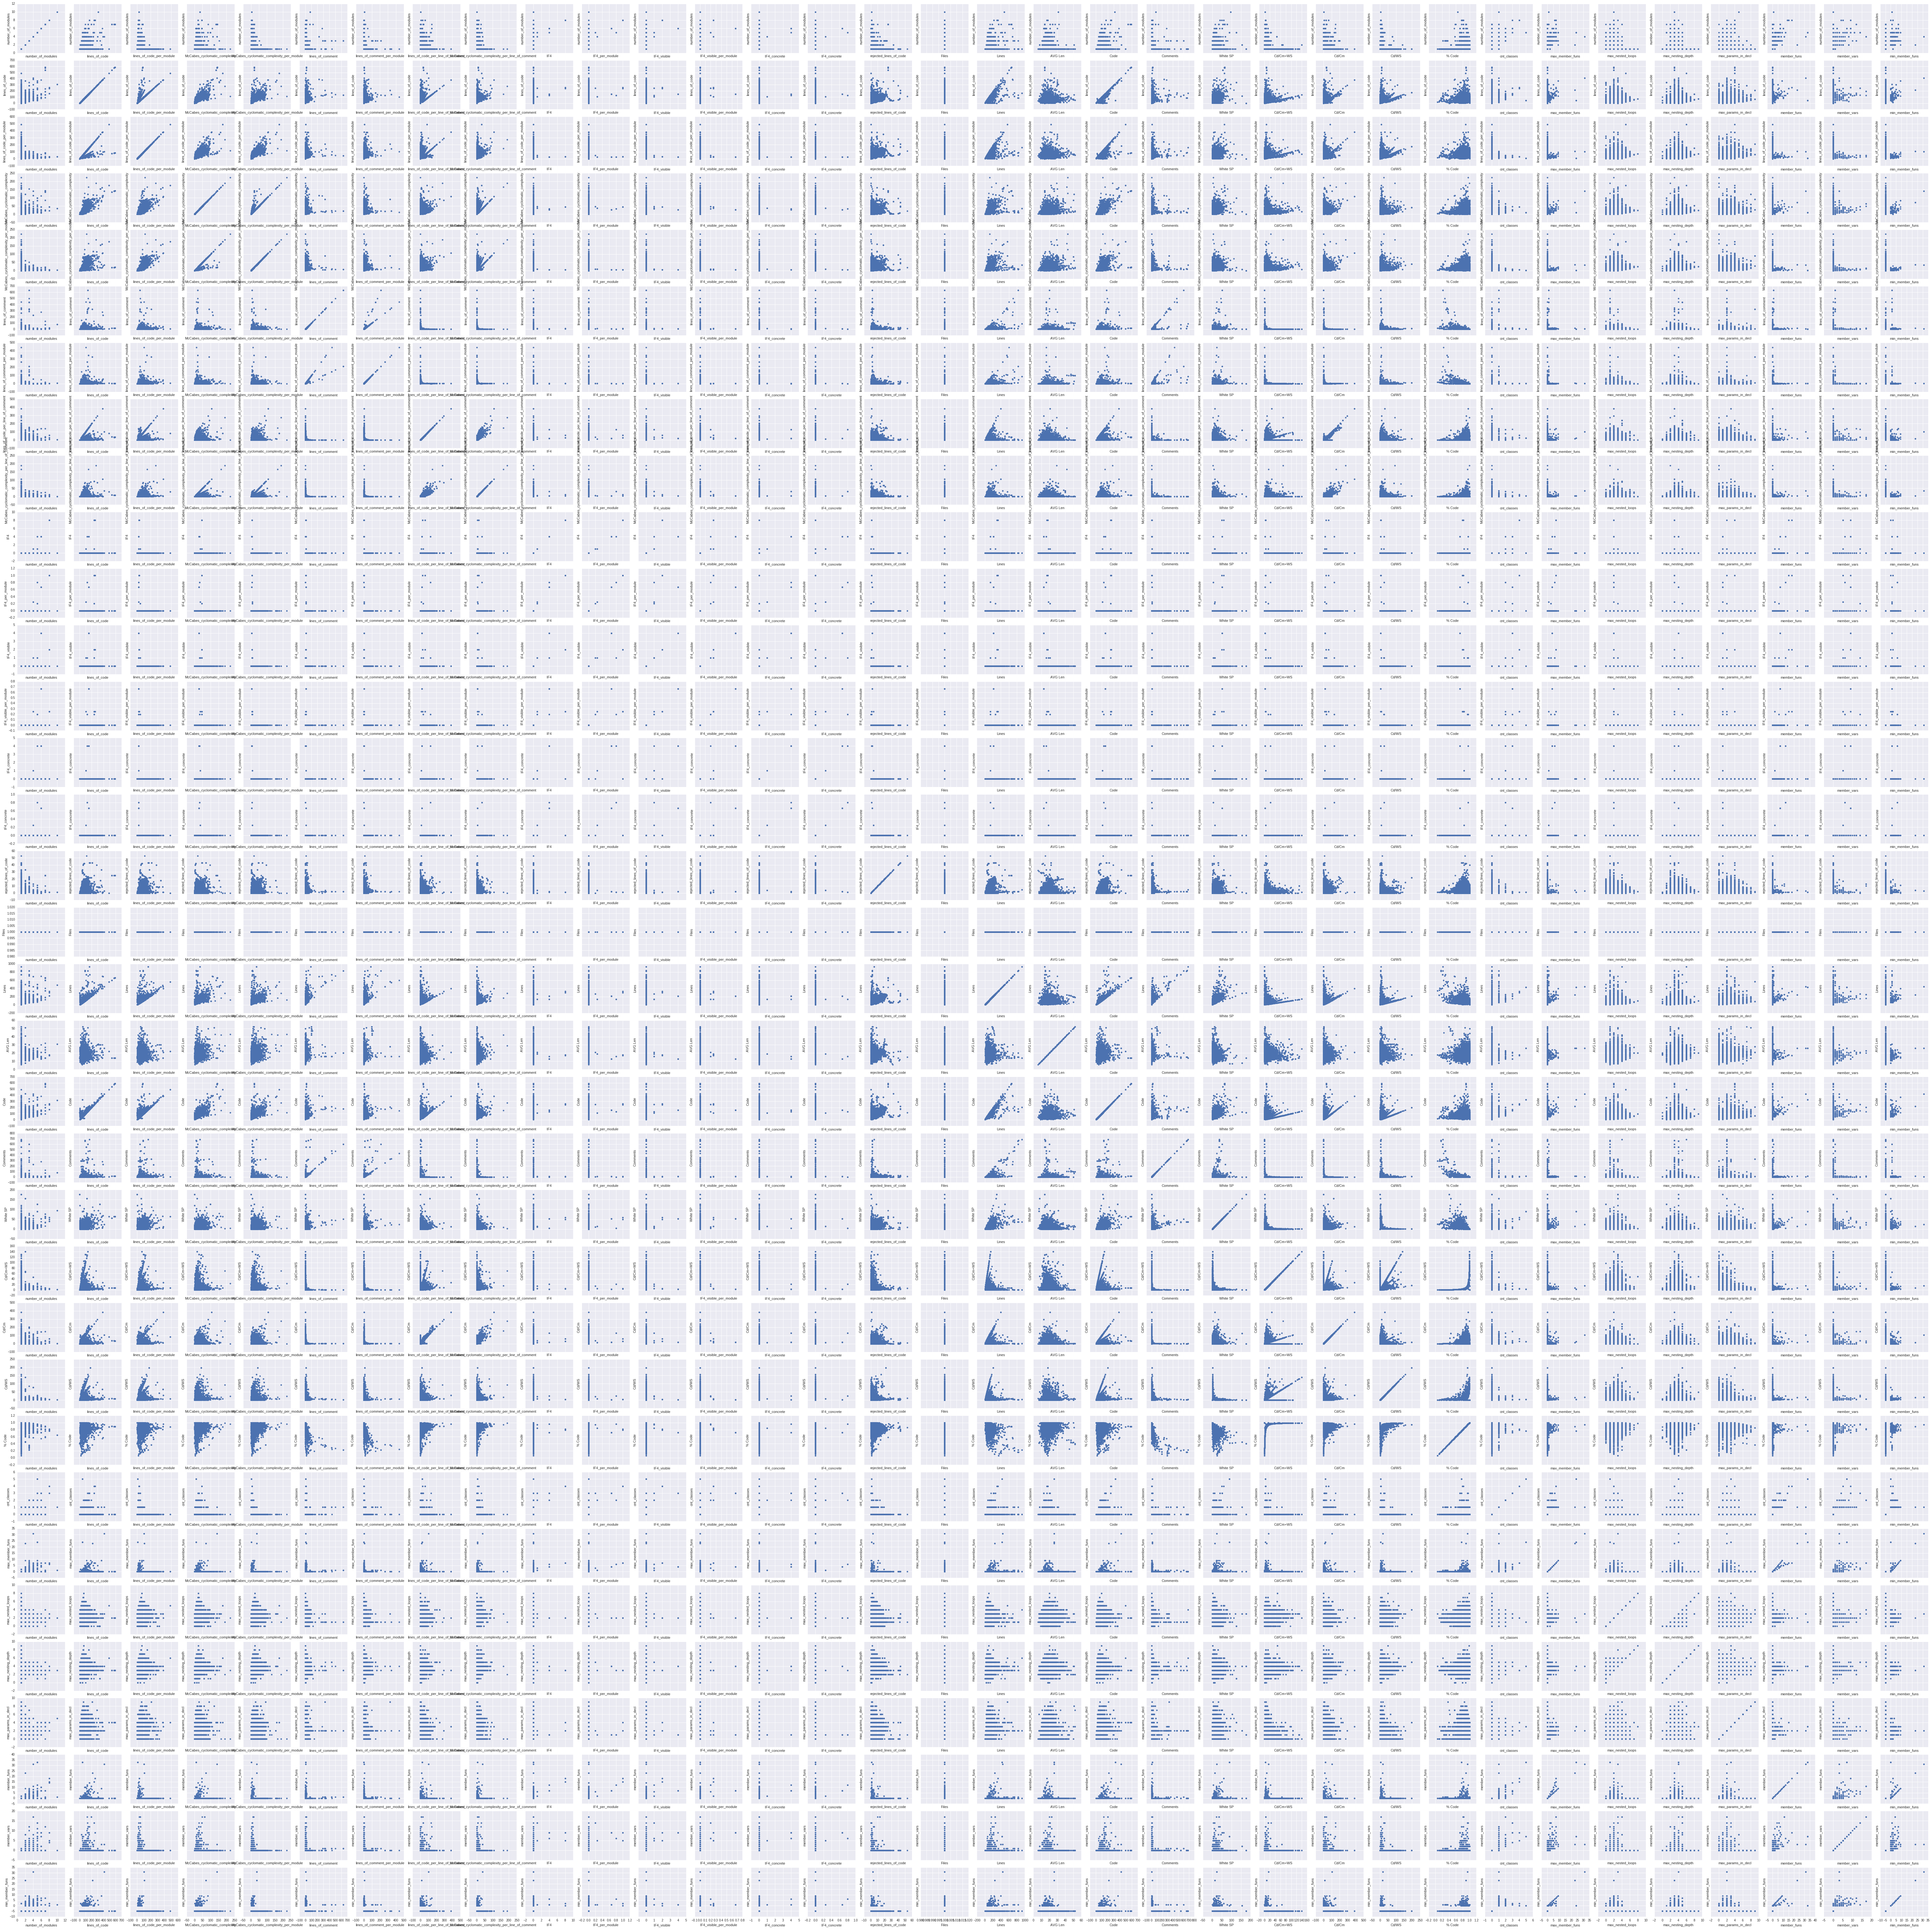

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(df_before_feature_sel)
g = g.map(plt.scatter)

for i in range(len(labels)):
    for j in range(len(labels)):
        g.axes[j,i].xaxis.set_label_text(labels[i])
        g.axes[j,i].yaxis.set_label_text(labels[j])

plt.show()                                         

In [9]:
df_descriptions = df_before_feature_sel.describe()
df_descriptions.columns = labels
print (df_descriptions.T)

                                                     count       mean  \
number_of_modules                                  18006.0   1.089692   
lines_of_code                                      18006.0  58.985227   
lines_of_code_per_module                           18006.0  55.167535   
McCabes_cyclomatic_complexity                      18006.0  16.242030   
McCabes_cyclomatic_complexity_per_module           18006.0  15.353076   
lines_of_comment                                   18006.0   3.765467   
lines_of_comment_per_module                        18006.0   3.345377   
lines_of_code_per_line_of_comment                  18006.0  12.402640   
McCabes_cyclomatic_complexity_per_line_of_comment  18006.0   3.371949   
IF4                                                18006.0   0.003777   
IF4_per_module                                     18006.0   0.000583   
IF4_visible                                        18006.0   0.002110   
IF4_visible_per_module                             

In [10]:
# y is vector of labels
def create_labels(y):
    y_l = np.copy(y)
    for i in range(y.shape[0]):
        if y[i] >= 80: 
            y_l[i] = 5
        if y[i] >= 60 and y[i] < 80: 
            y_l[i] = 4
        if y[i] >= 40 and y[i] < 60:
            y_l[i] = 3
        if y[i] >= 20 and y[i] < 40:
            y_l[i] = 2
        if y[i] < 20: 
            y_l[i] = 1
    return y_l

y_labels = create_labels(y)

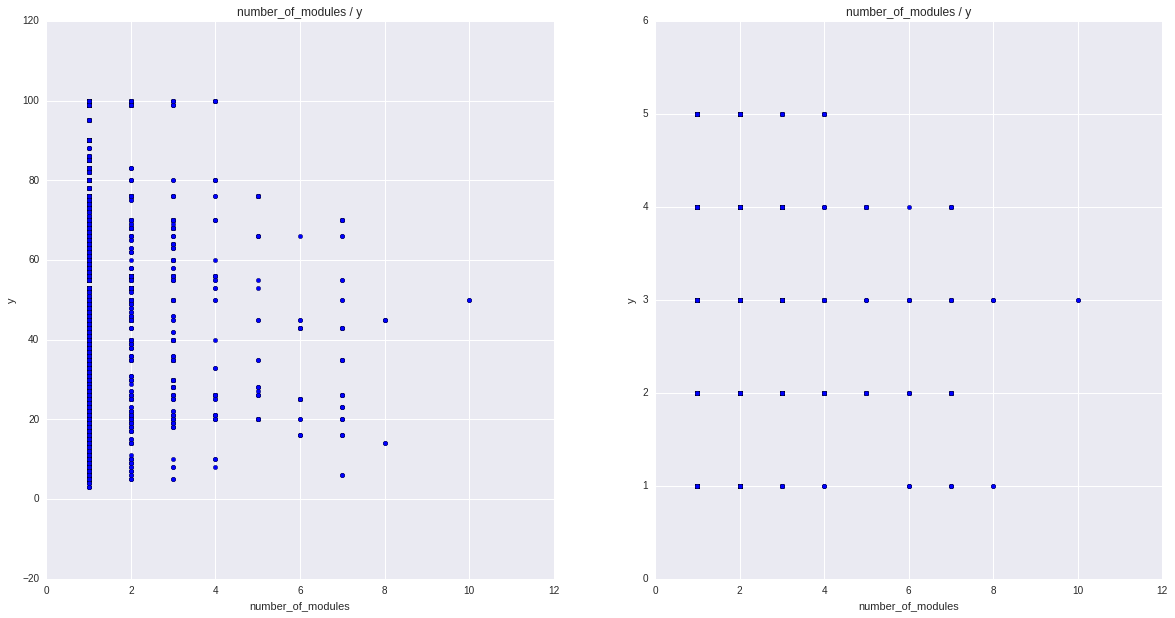

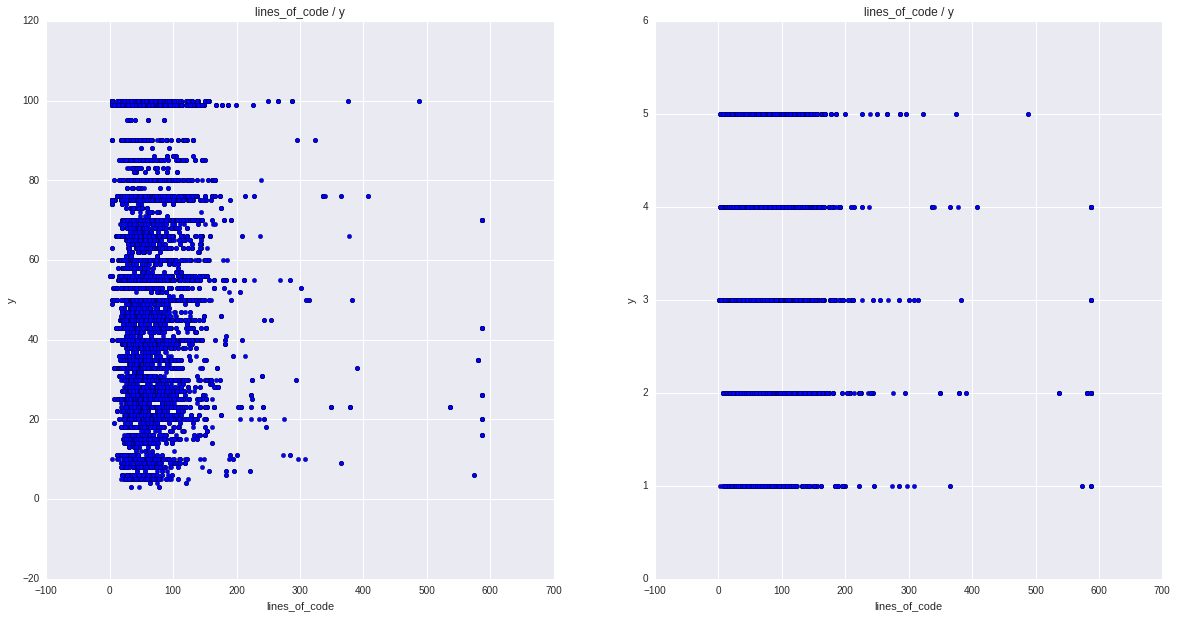

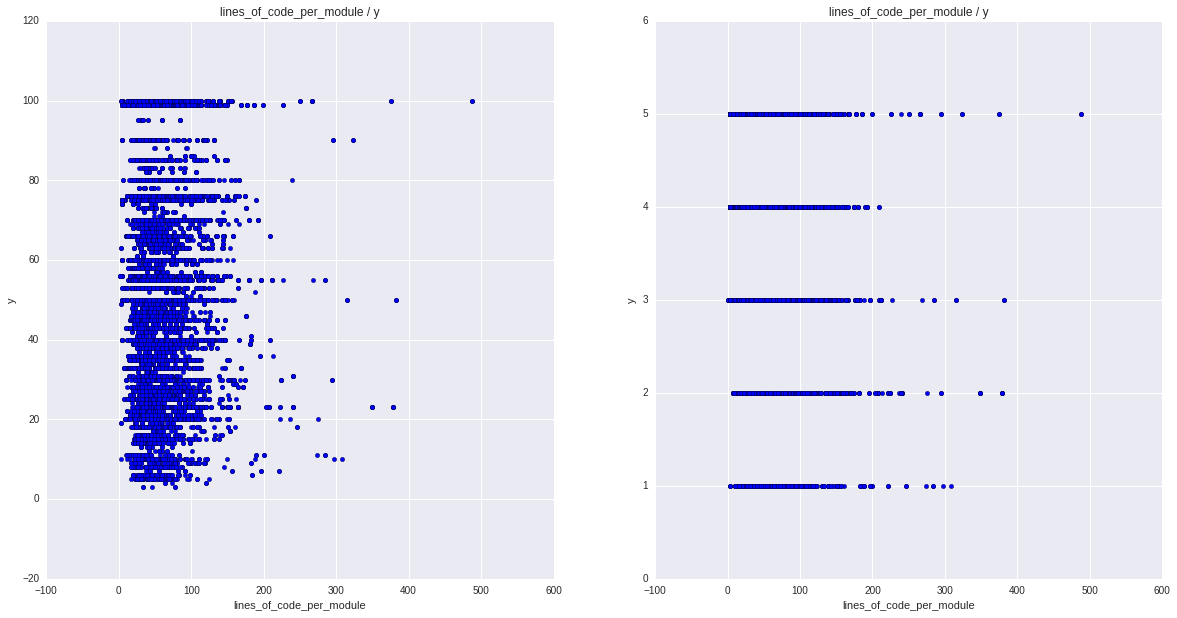

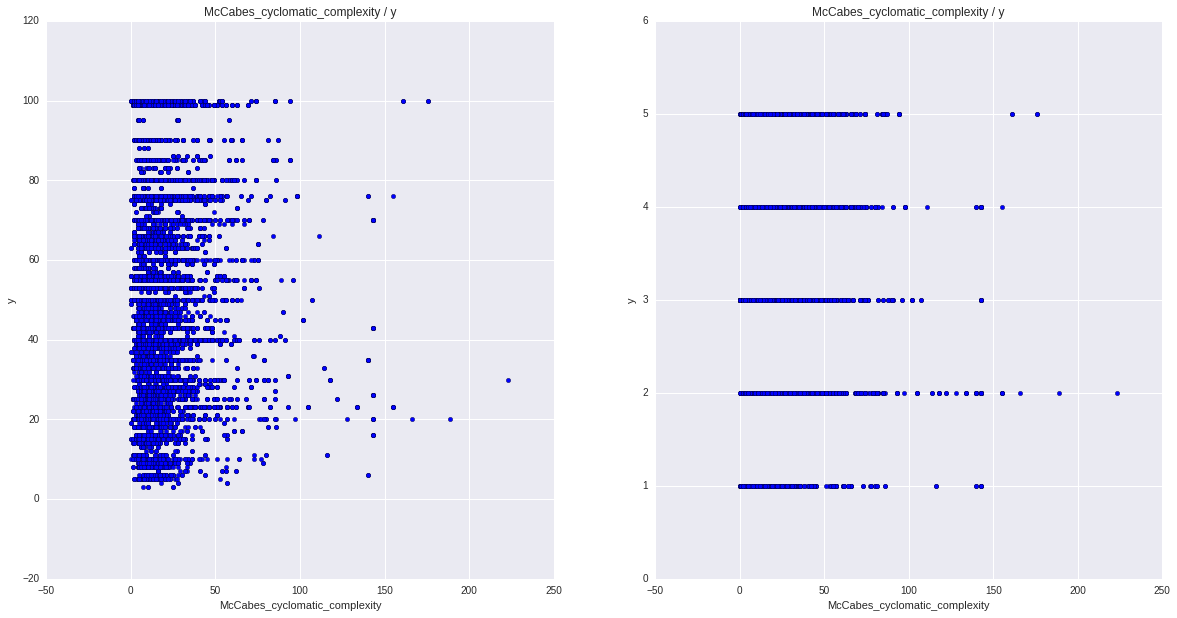

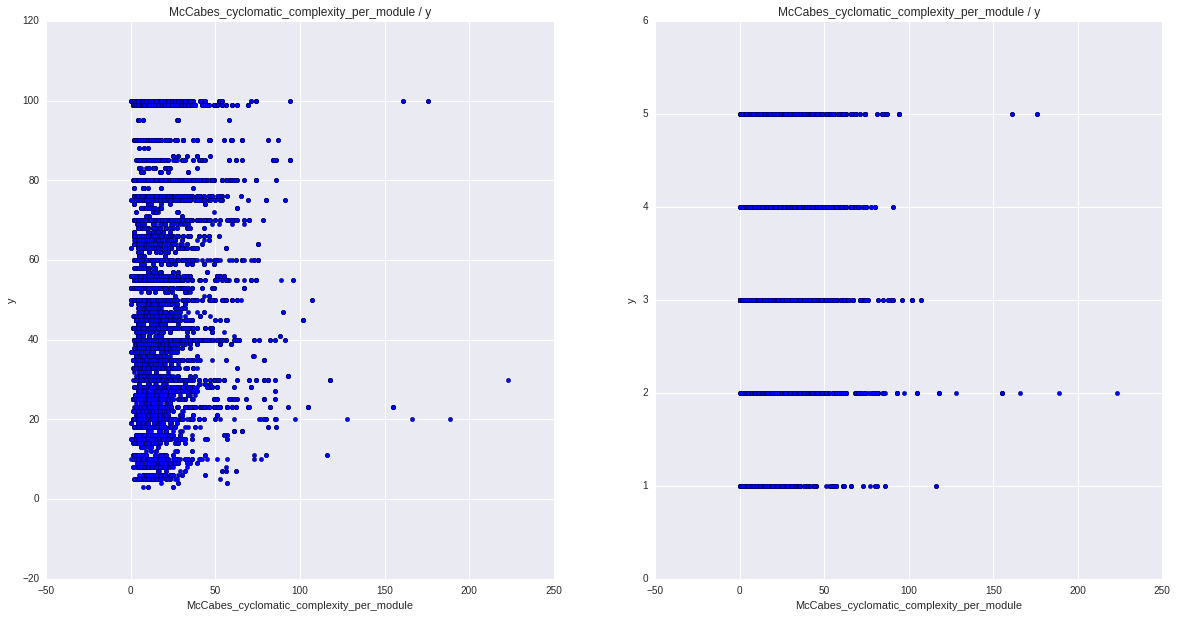

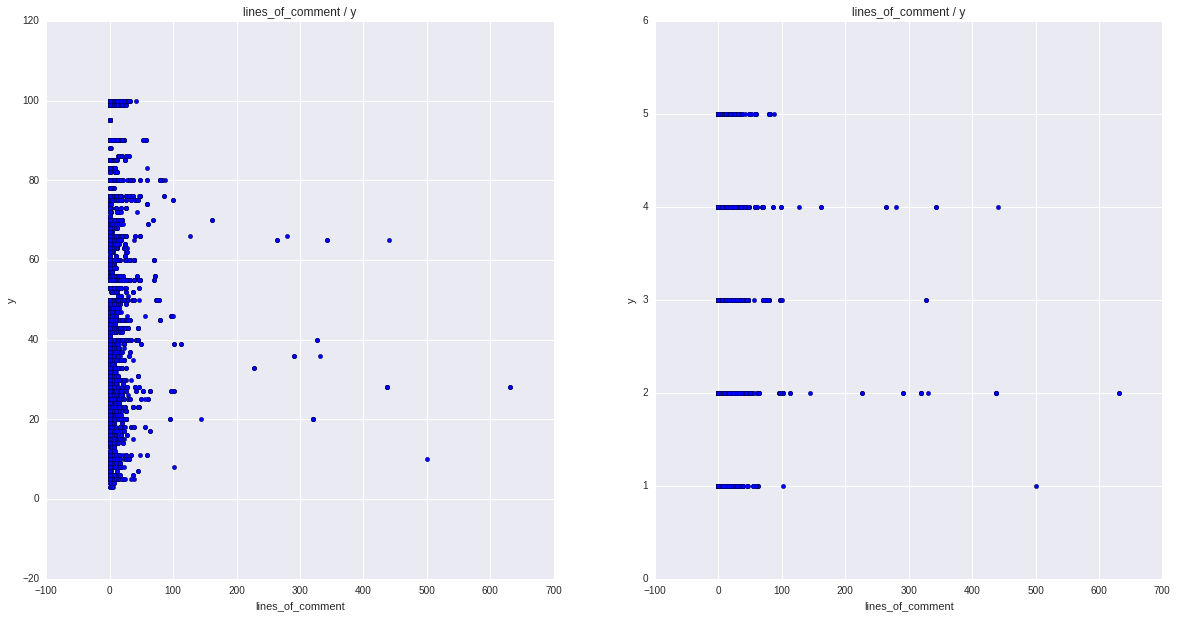

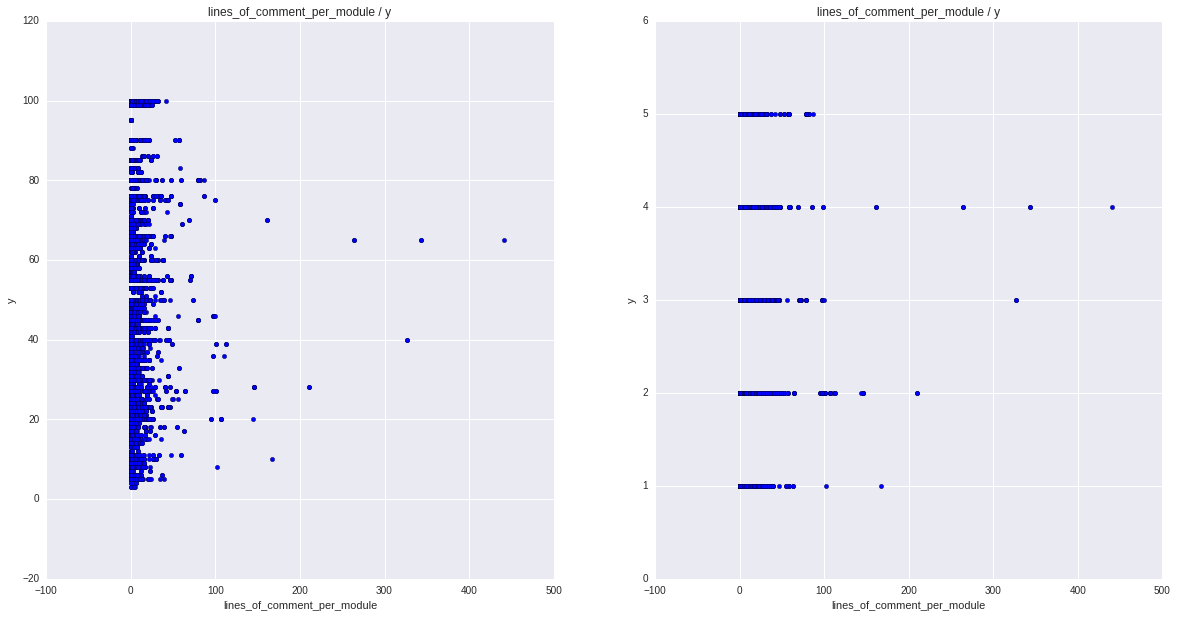

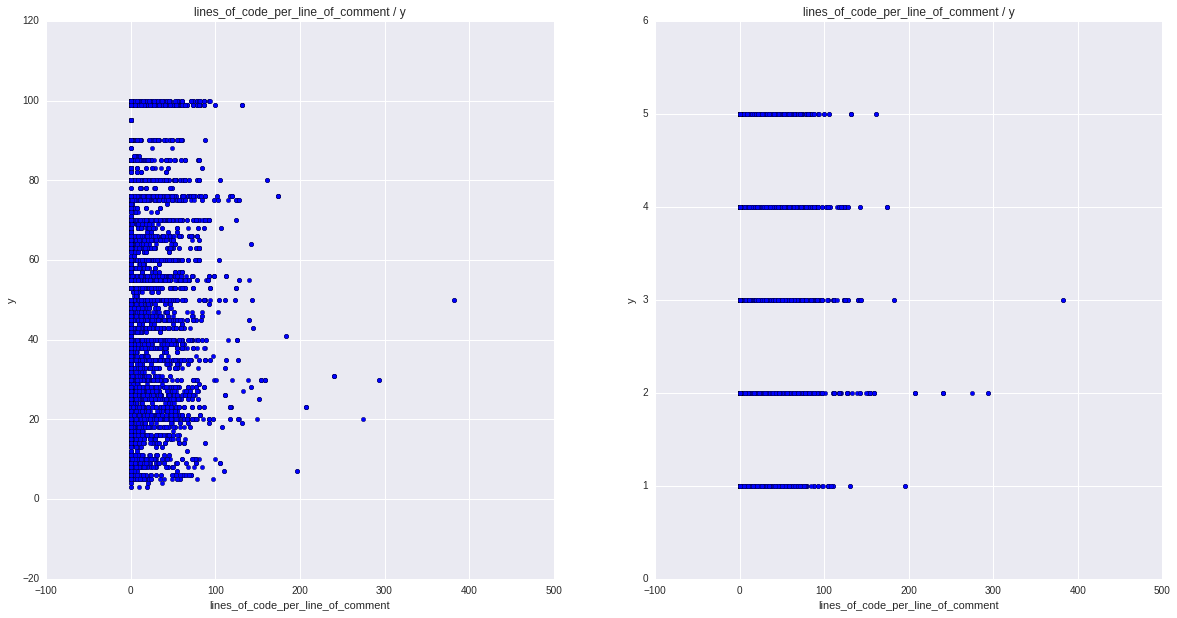

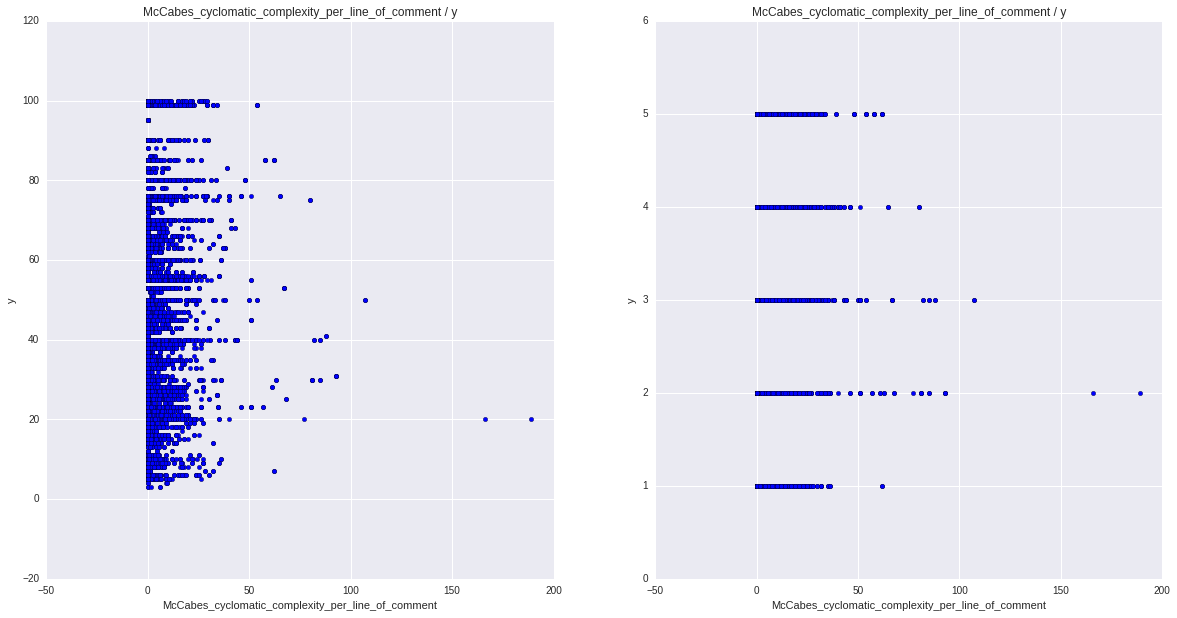

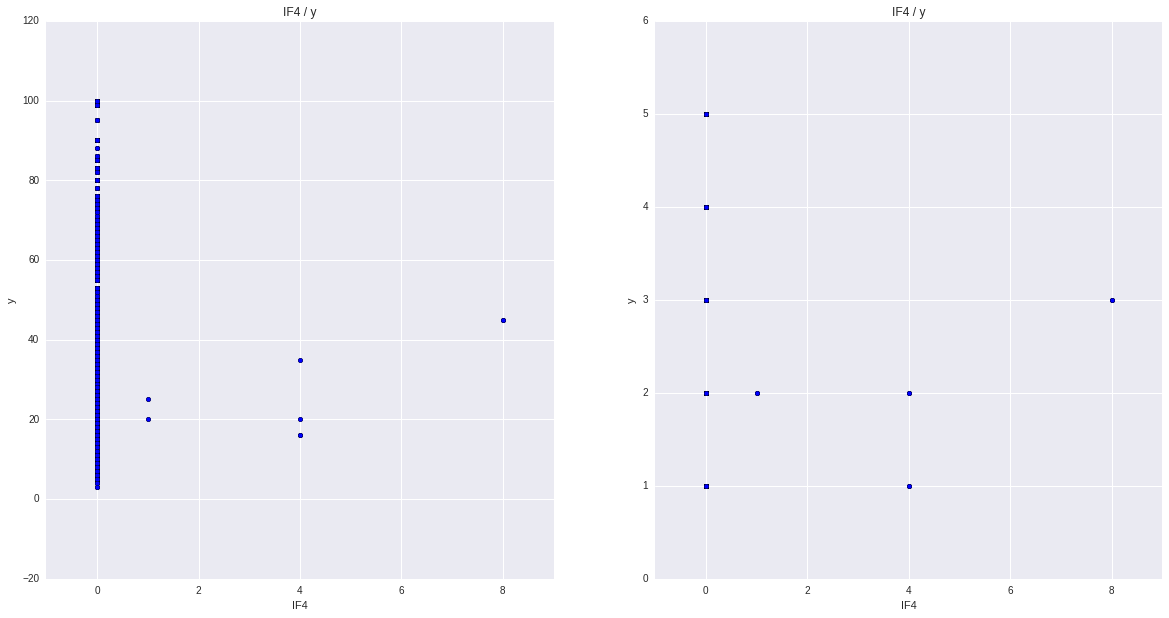

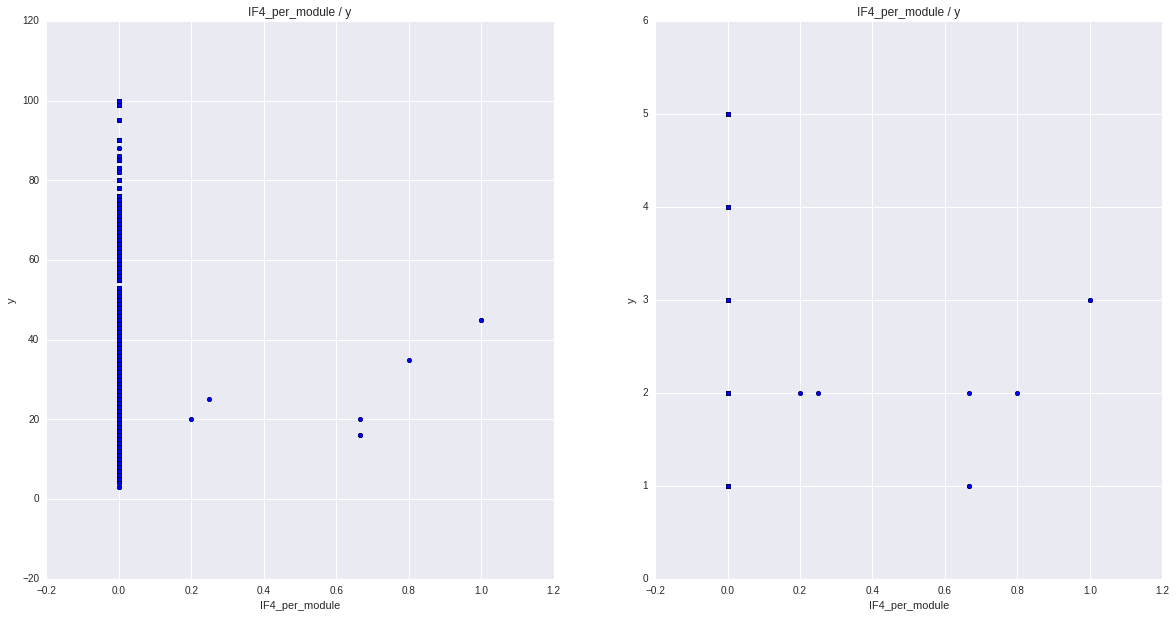

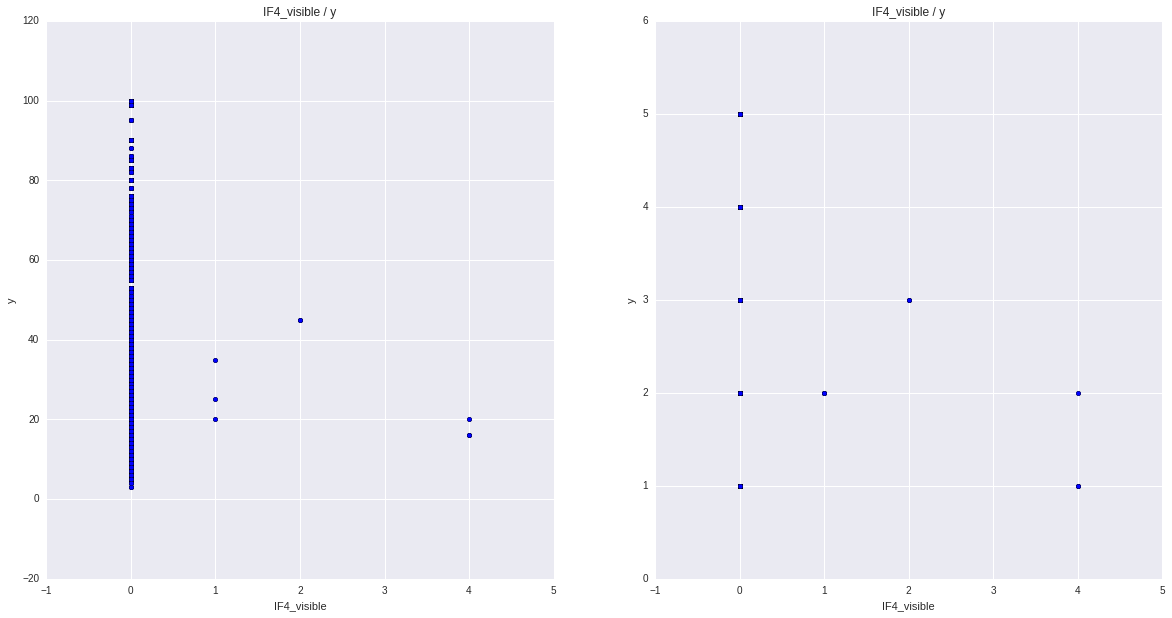

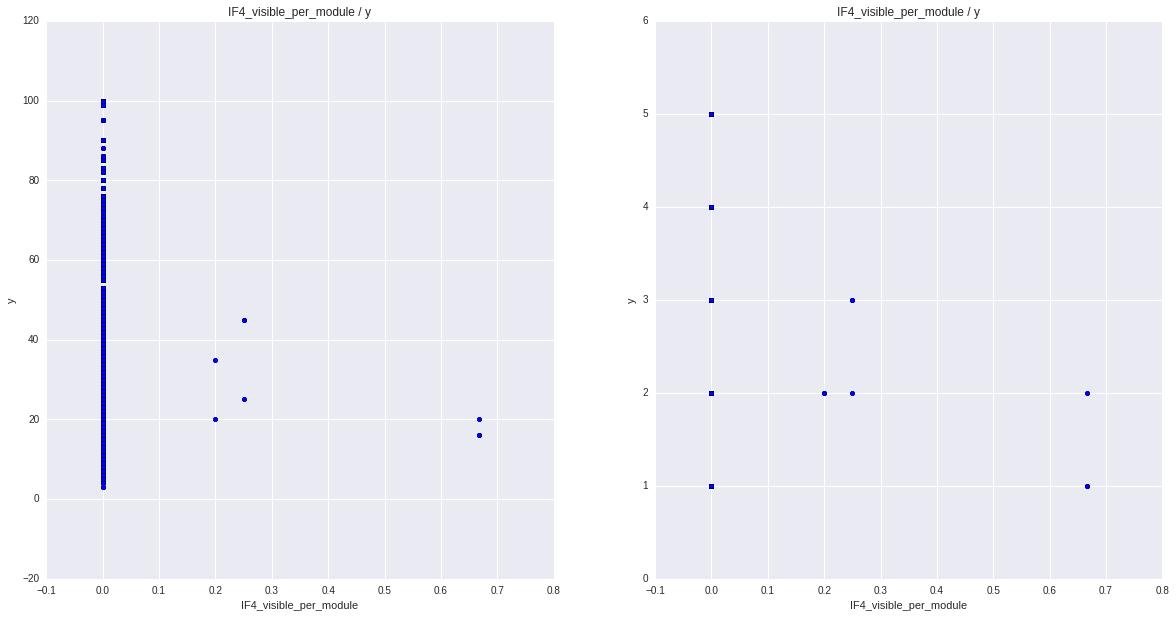

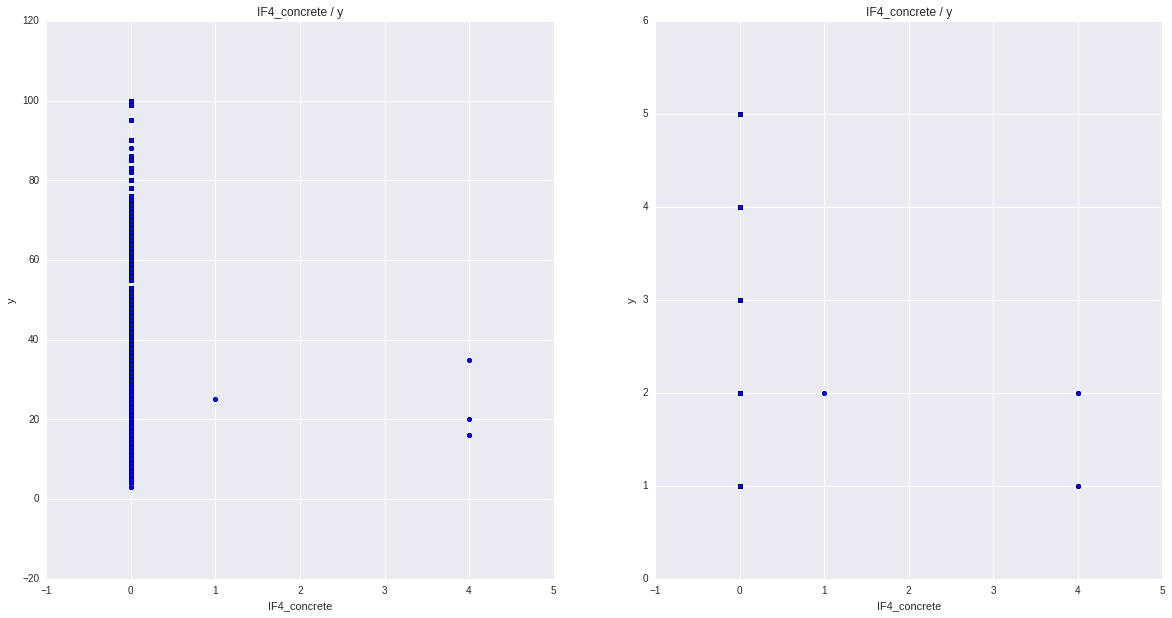

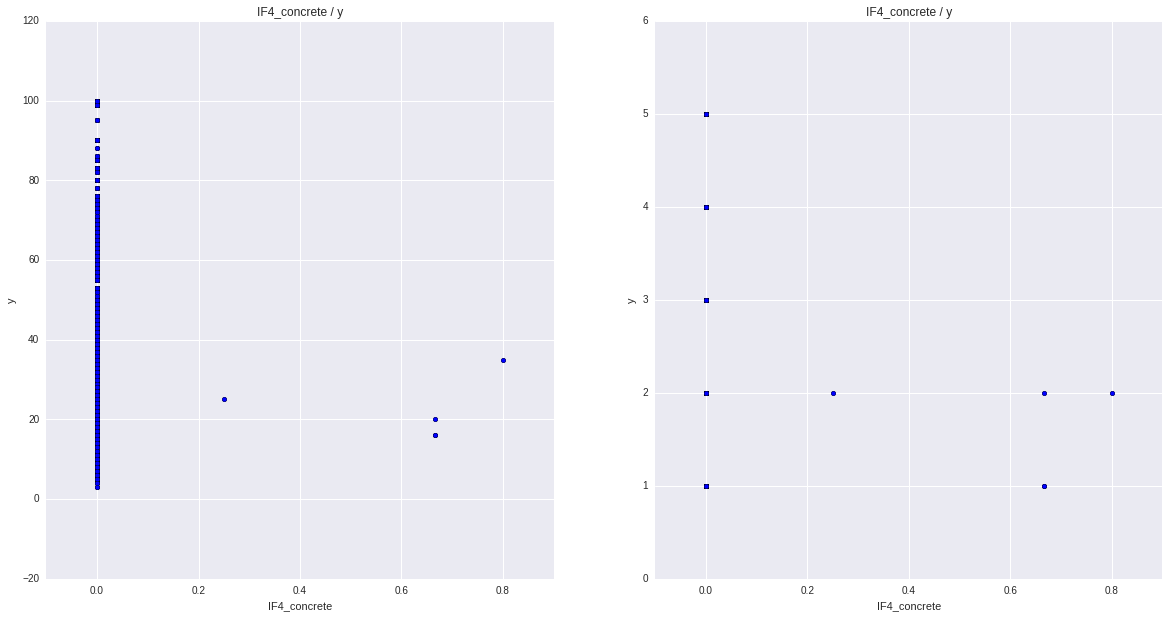

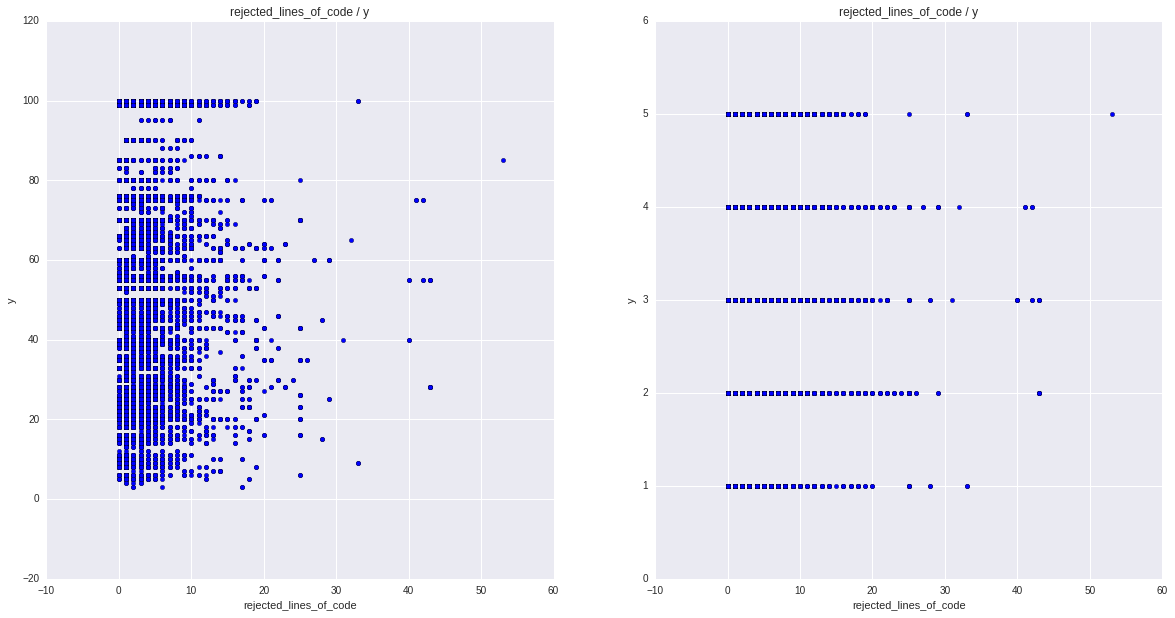

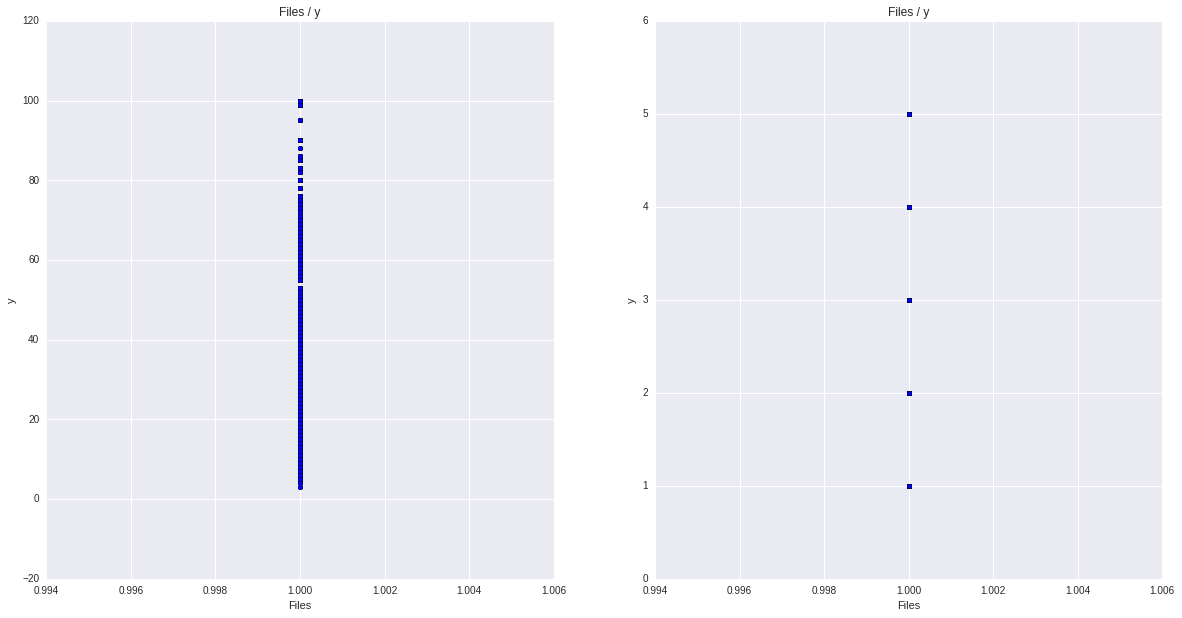

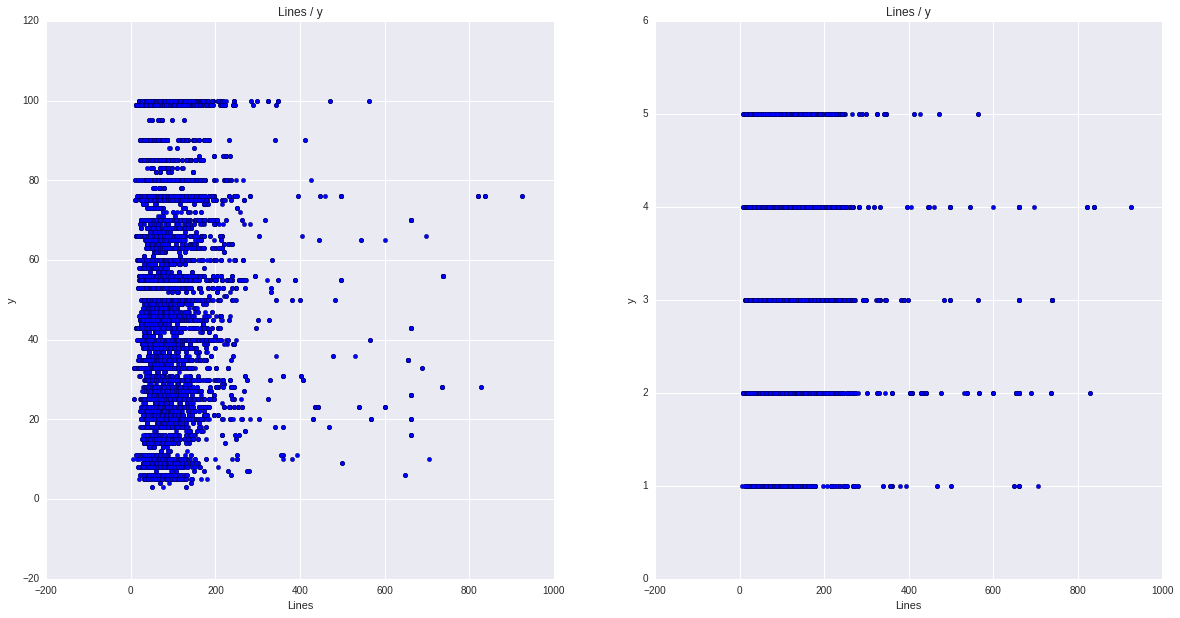

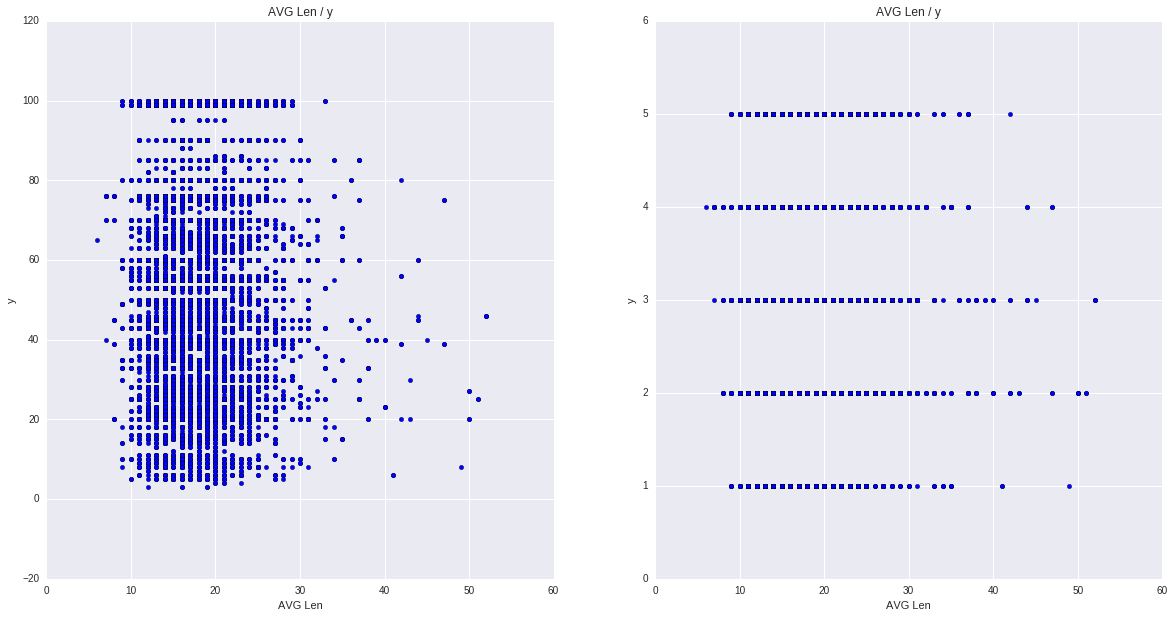

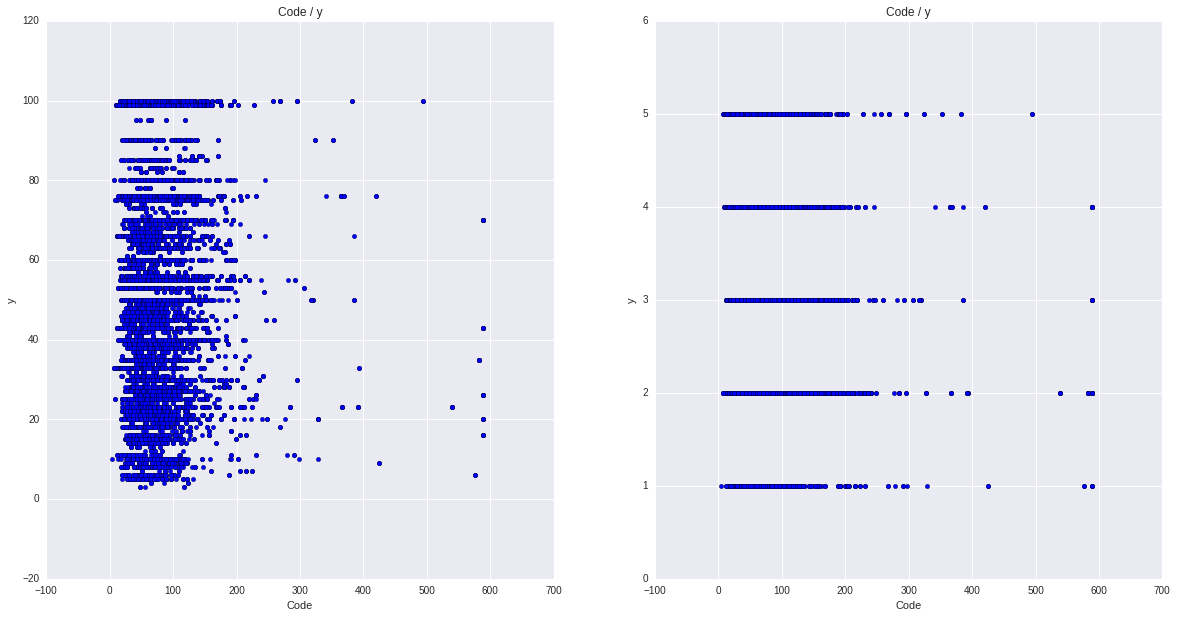

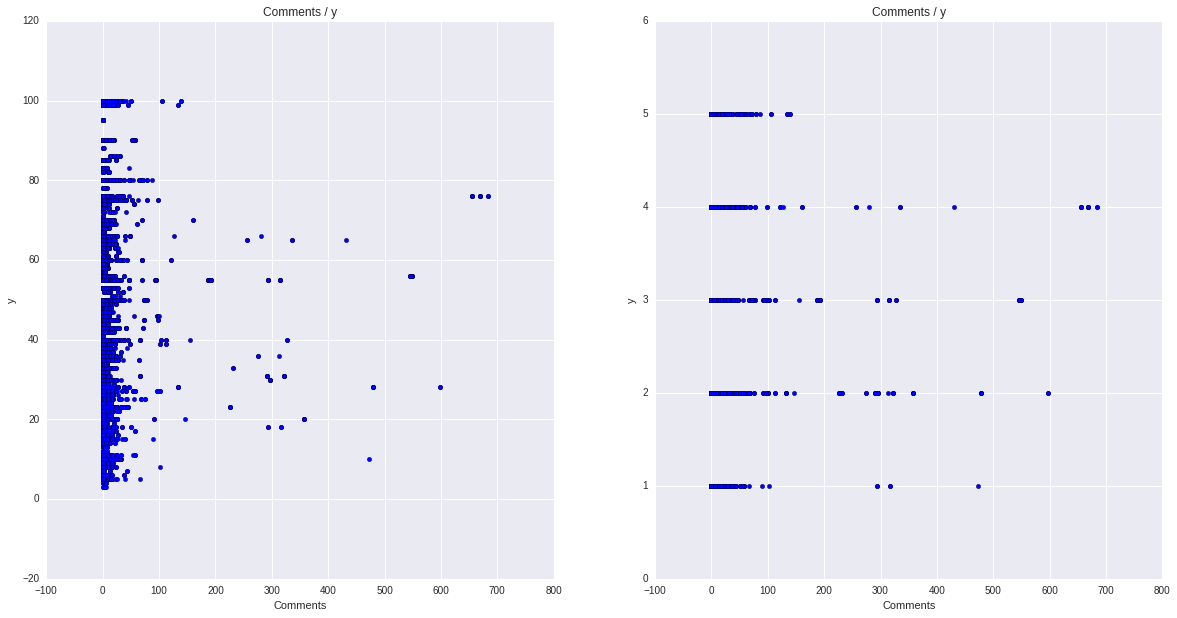

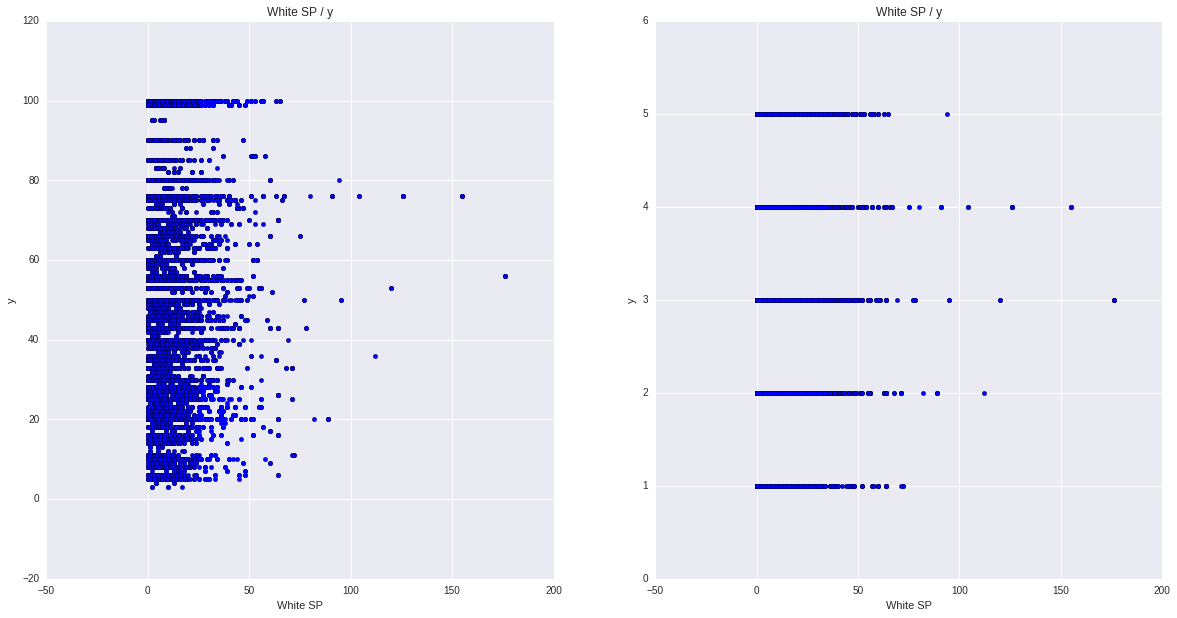

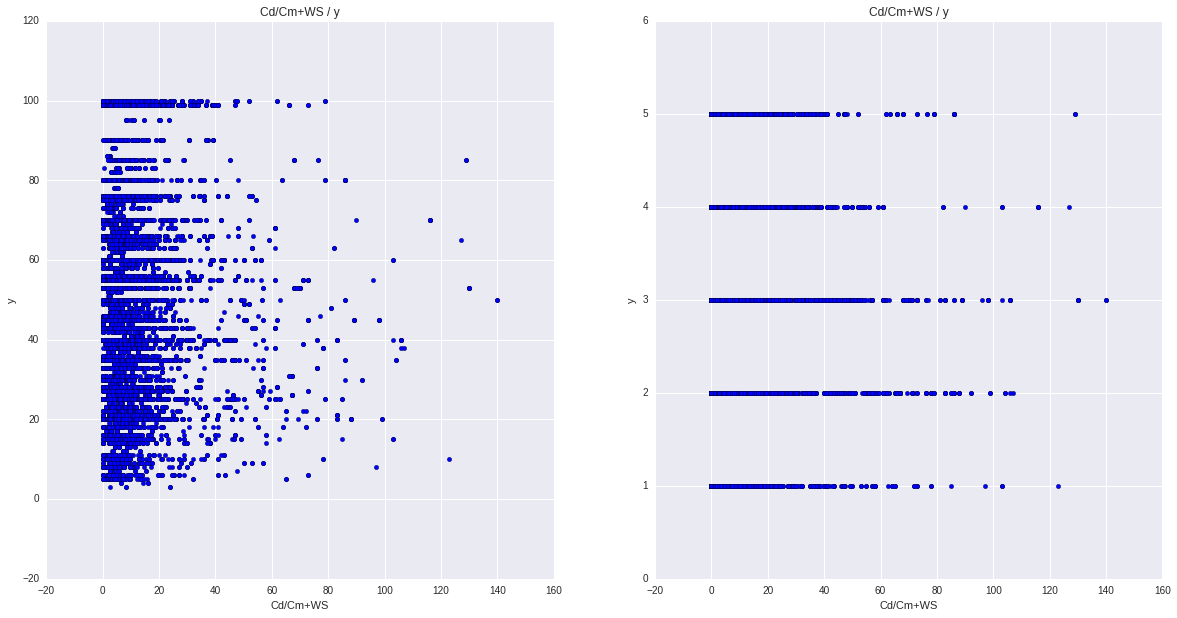

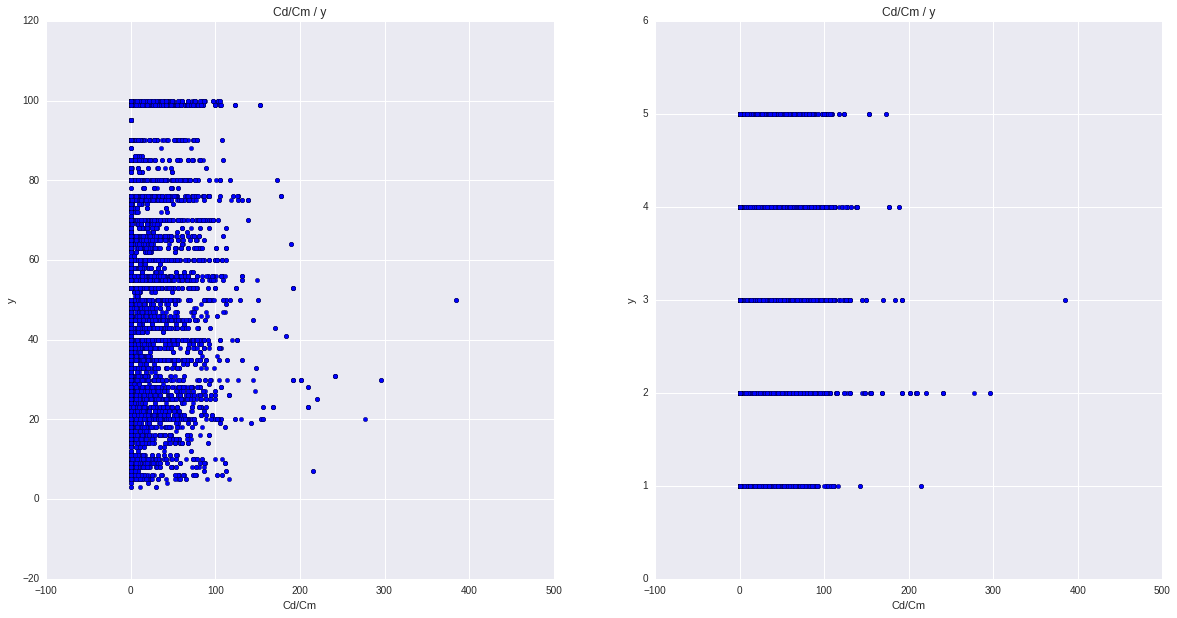

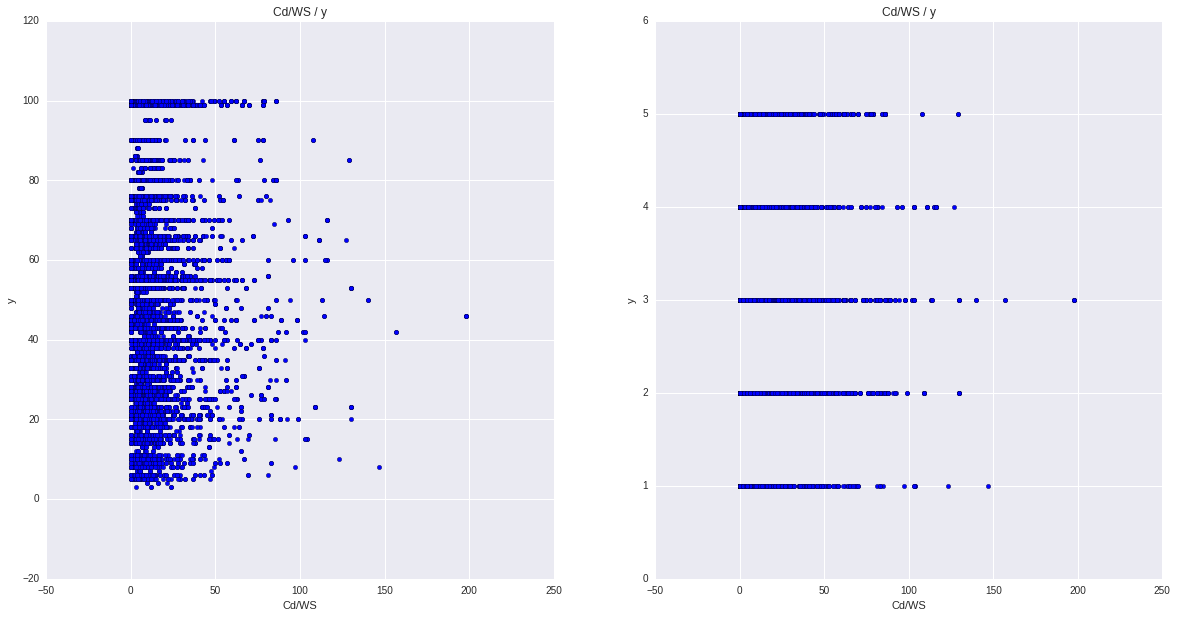

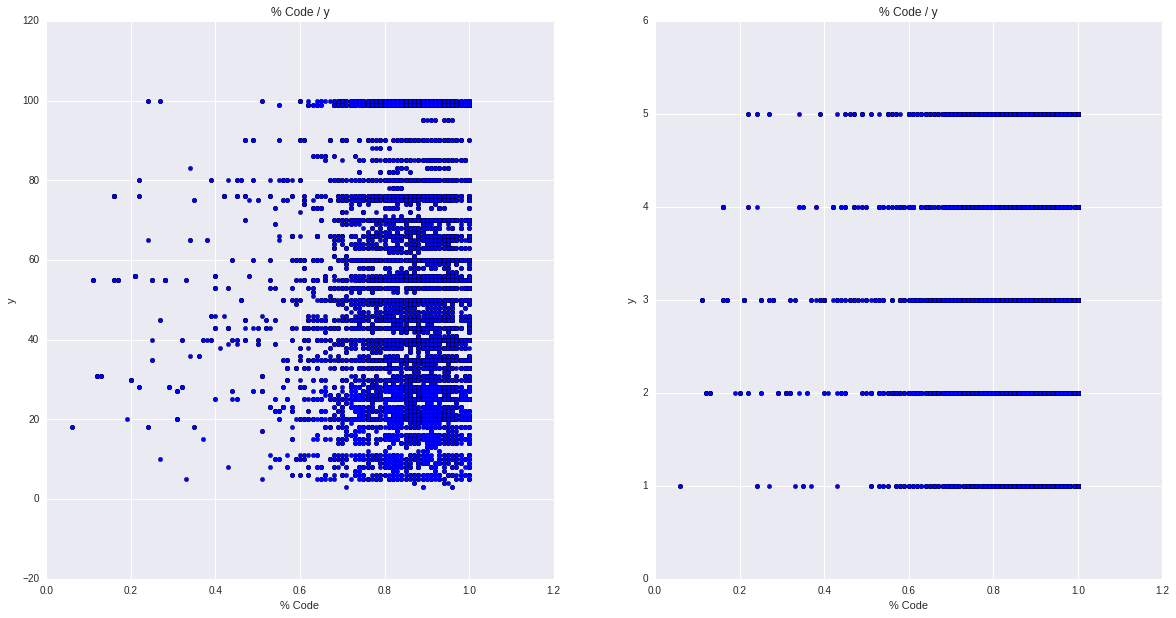

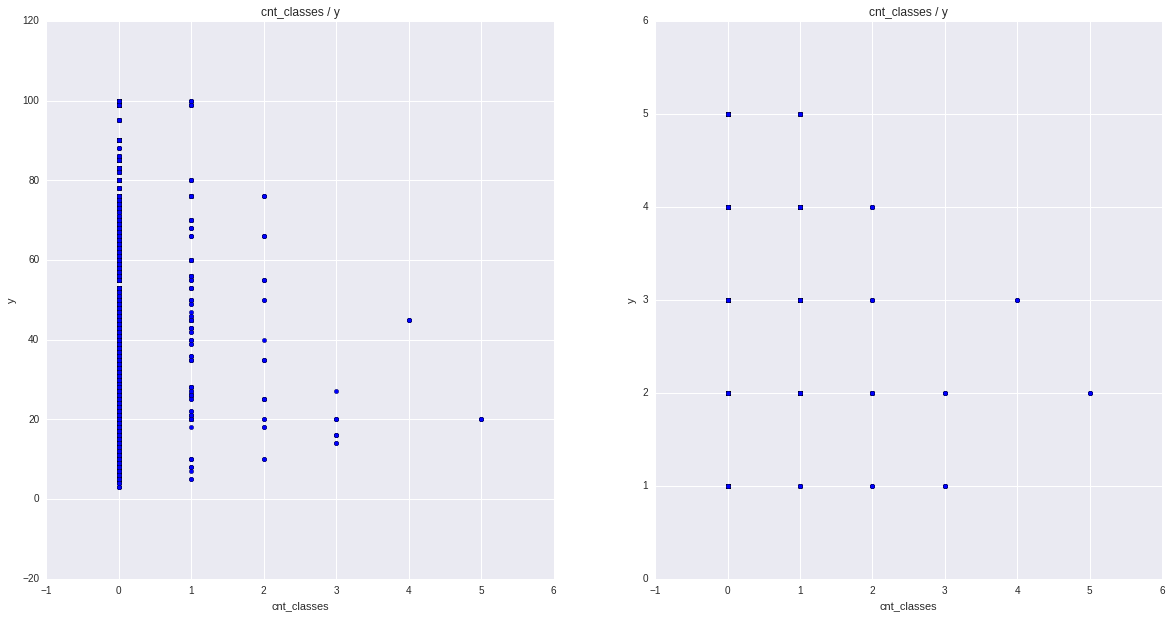

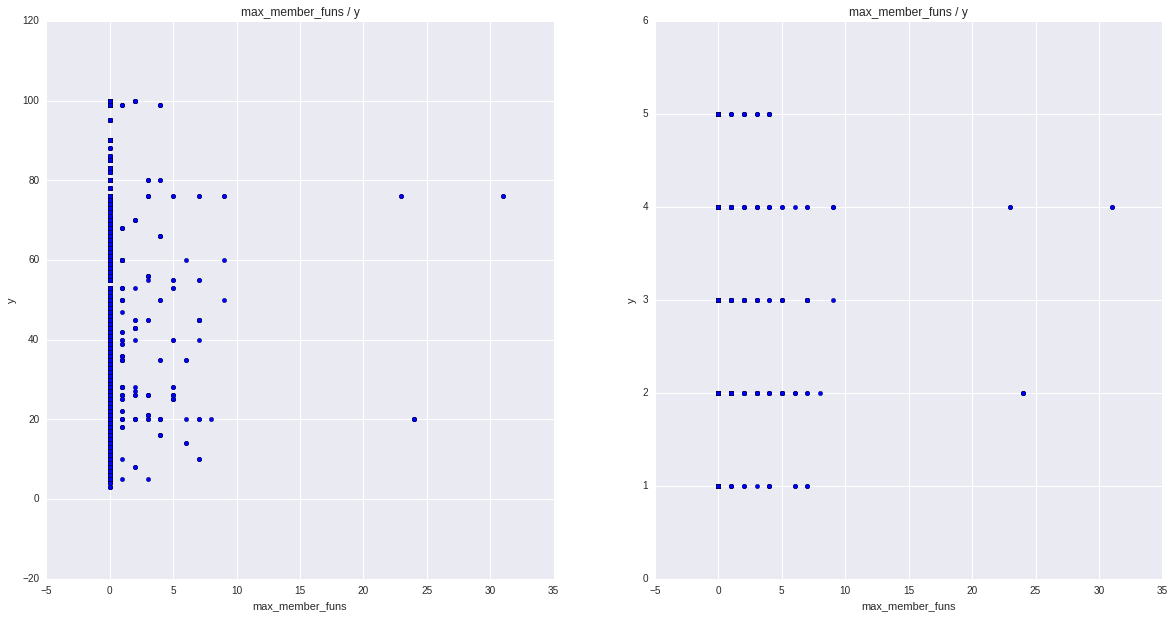

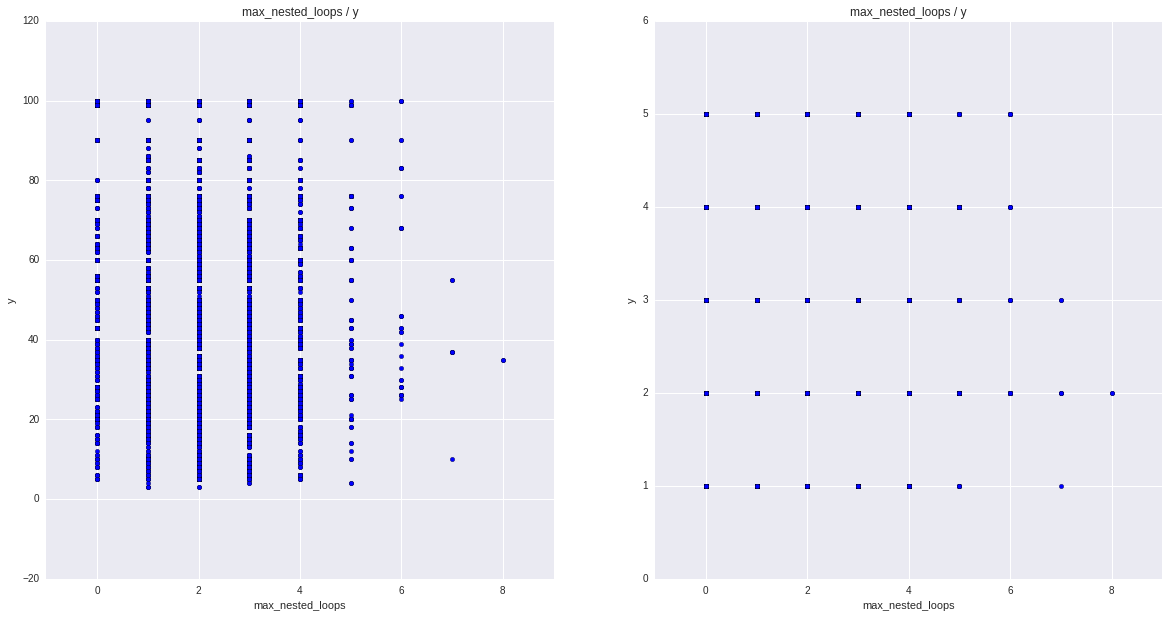

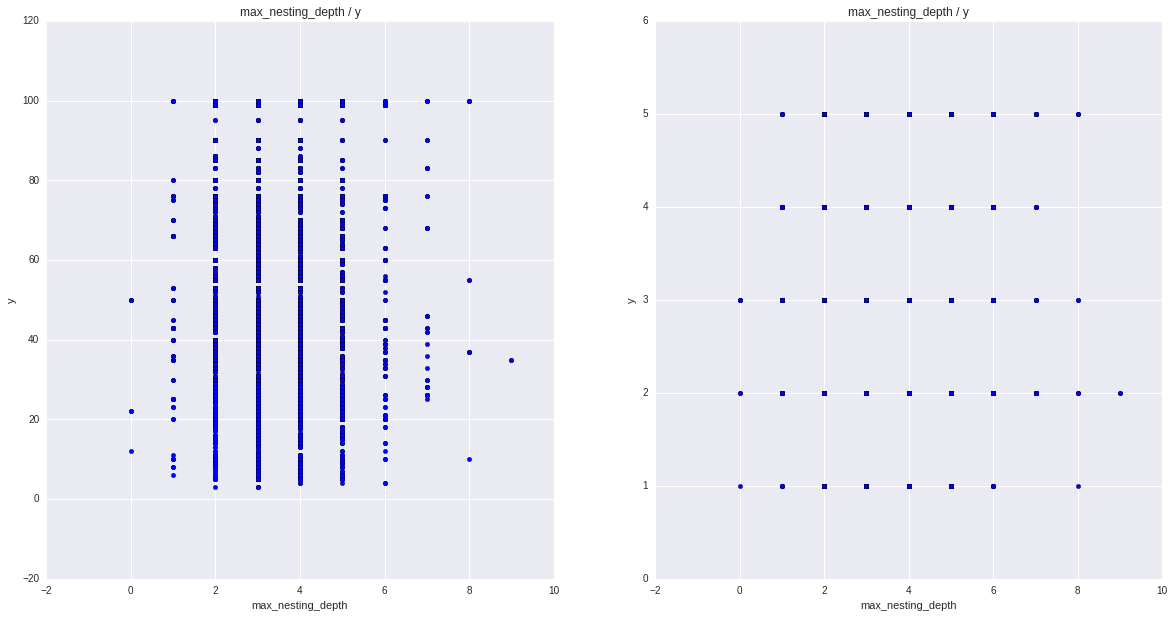

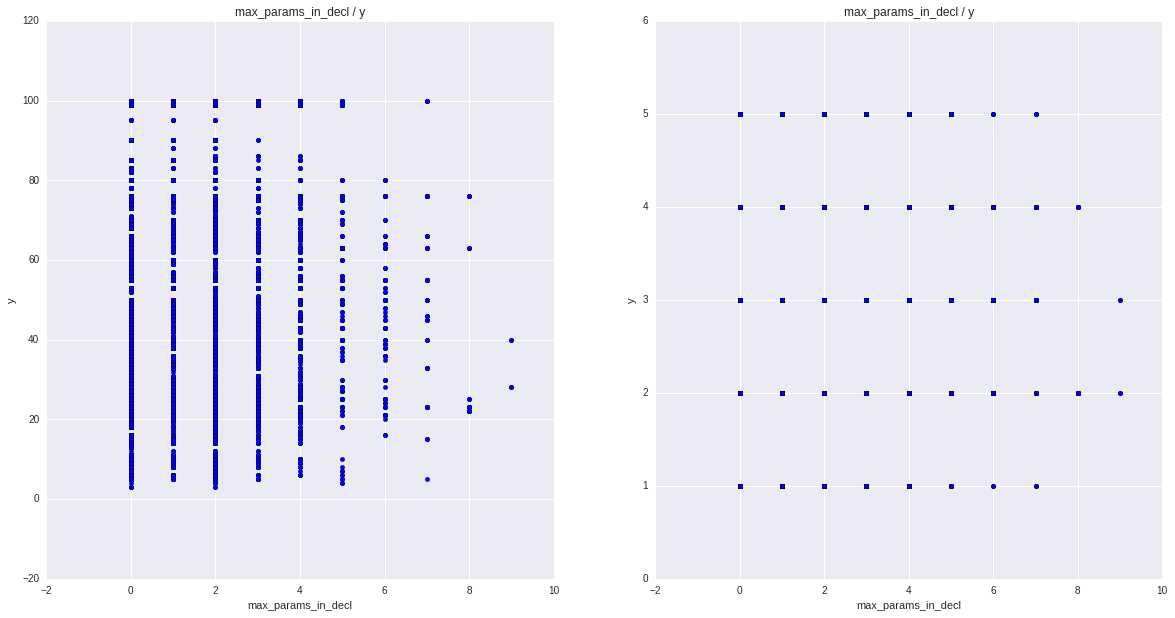

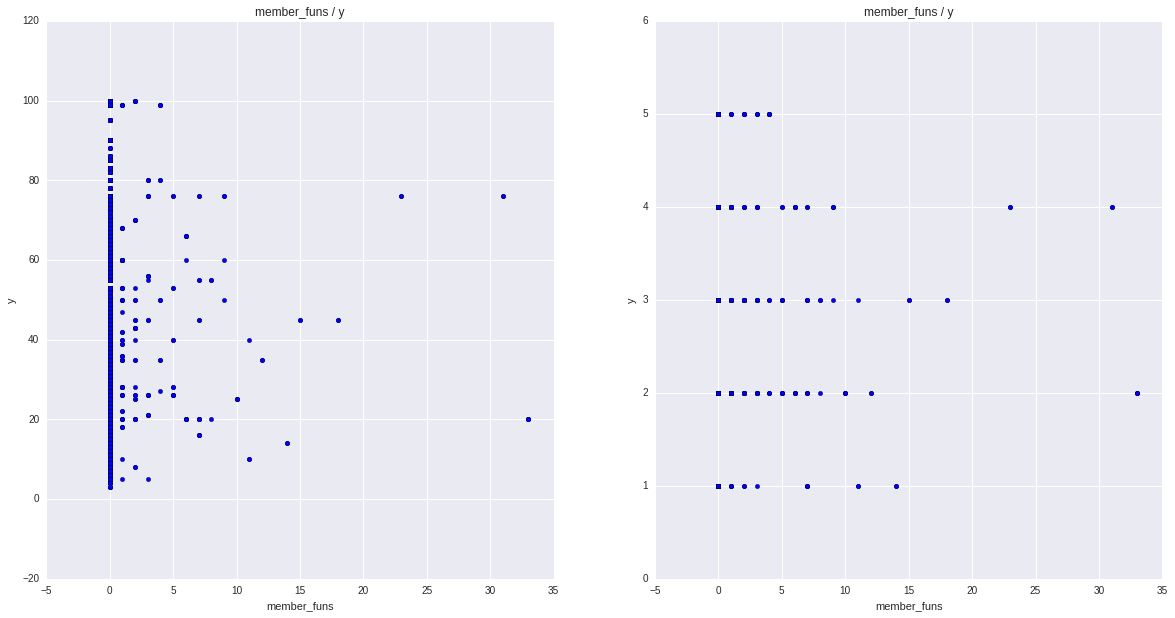

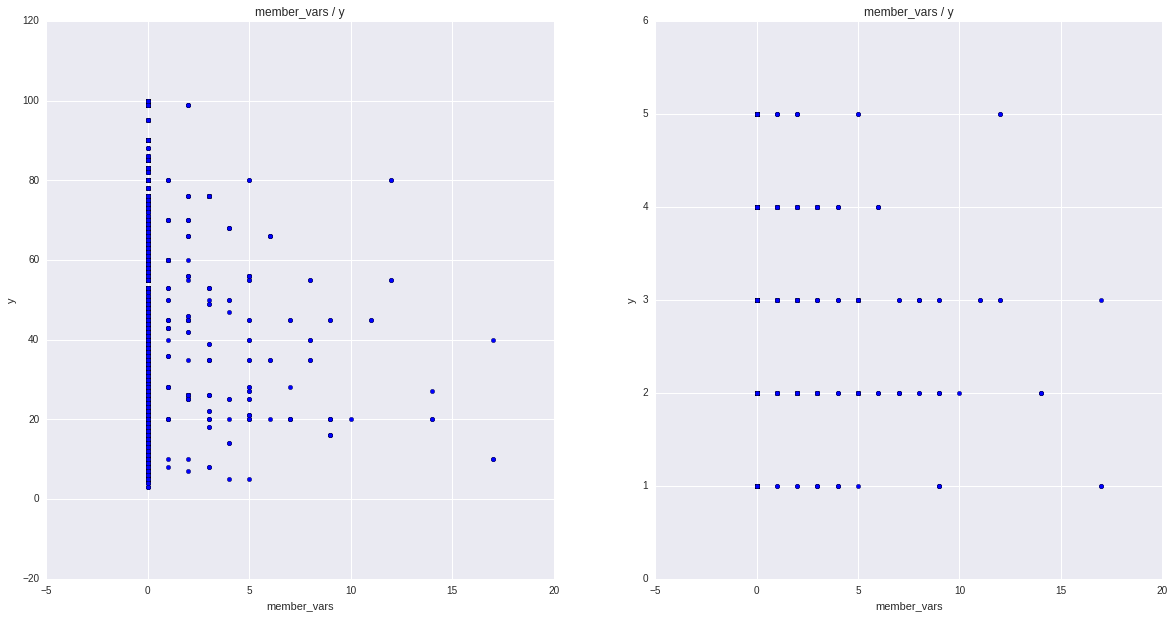

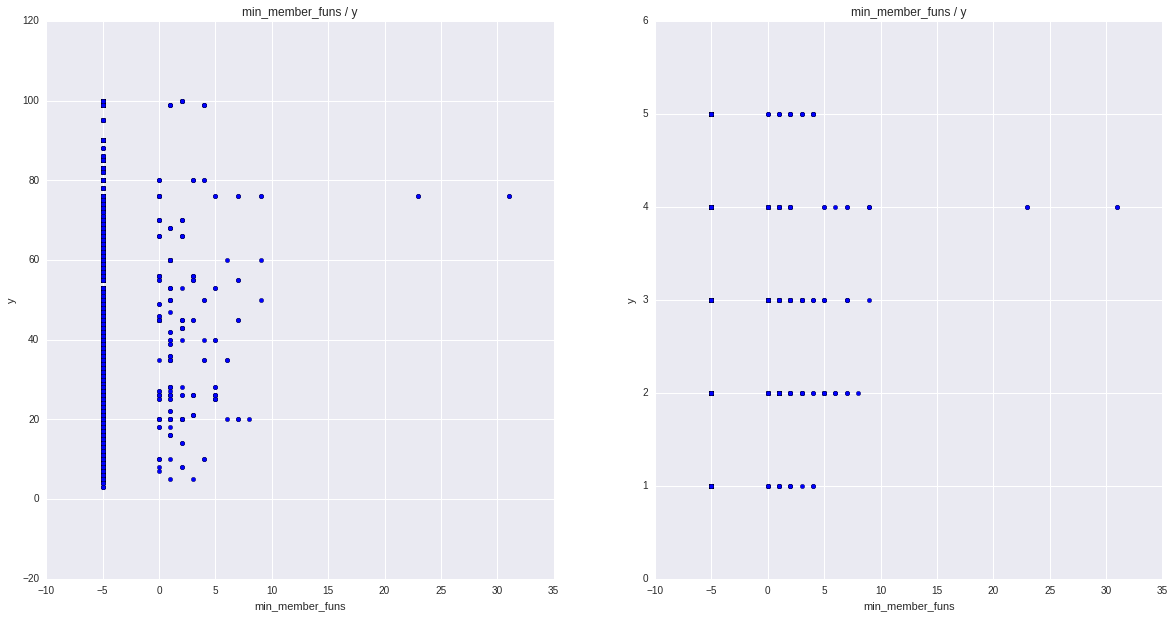

In [11]:
import matplotlib.pyplot as plt

for label_index in range(34):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title(labels[label_index] + ' / y')
    plt.xlabel(labels[label_index])
    plt.ylabel('y')
    
    temp1 = list()
    for k in range(0, len(X)):
        temp1.append(X[k][label_index])
    plt.scatter(temp1, y)
    plt.subplot(1, 2, 2)
    
    plt.title(labels[label_index] + ' / y')
    plt.xlabel(labels[label_index])
    plt.ylabel('y')
        
    plt.scatter(temp1, y_labels)
    plt.show()

In [12]:
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

for label_index in range(34):
    temp1 = list()
    for k in range(0, len(X)):
        temp1.append(X[k][label_index])  
                
    print (labels[label_index], "=", pearsonr(temp1, y)[0])

(u'number_of_modules', '=', -0.050458175972308013)
(u'lines_of_code', '=', -0.036836198168590815)
(u'lines_of_code_per_module', '=', -0.013793768830261805)
(u'McCabes_cyclomatic_complexity', '=', -0.01648400122327465)
(u'McCabes_cyclomatic_complexity_per_module', '=', 0.00055218632738596087)
(u'lines_of_comment', '=', -0.040877140133435623)
(u'lines_of_comment_per_module', '=', -0.033675410931977061)
(u'lines_of_code_per_line_of_comment', '=', -0.042542058220526341)
(u'McCabes_cyclomatic_complexity_per_line_of_comment', '=', -0.031823579495655667)
(u'IF4', '=', -0.01997371092926483)
(u'IF4_per_module', '=', -0.02305769950230967)
(u'IF4_visible', '=', -0.02827307171690736)
(u'IF4_visible_per_module', '=', -0.029460728134398918)
(u'IF4_concrete', '=', -0.026372088674777135)
(u'IF4_concrete', '=', -0.026176144598503117)
(u'rejected_lines_of_code', '=', 0.060229010036354683)
(u'Files', '=', nan)
(u'Lines', '=', -0.023744728788892795)
(u'AVG Len', '=', -0.0062645015530785331)
(u'Code', '=',